## Imports e DATA

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.compose import  make_column_transformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,RocCurveDisplay,roc_auc_score
import pickle as pk
import os


In [3]:
data= pd.read_csv('..\DADOS\DADOSJUNTOS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pessoa_id                       34485 non-null  object 
 1   idade                           34165 non-null  float64
 2   salario_anual                   34150 non-null  float64
 3   situacao_moradia                34154 non-null  object 
 4   tempo_de_trabalho               33231 non-null  float64
 5   motivo_do_emprestimo            34174 non-null  object 
 6   pontuacao                       34176 non-null  object 
 7   valor_emprestimo                34154 non-null  float64
 8   taxa_de_juros                   30859 non-null  float64
 9   possibilidade_de_inadimplencia  34142 non-null  float64
 10  renda_percentual                34170 non-null  float64
 11  inadimplente                    34119 non-null  object 
 12  tempo_solicitacao               

## Tratamento

In [4]:
### Lista de colunas para preencher com média
lista_media= ['idade', 'salario_anual', 'tempo_de_trabalho',
       'valor_emprestimo', 'taxa_de_juros', 'possibilidade_de_inadimplencia',
       'renda_percentual', 'tempo_solicitacao']
for i in lista_media:
    data[i].fillna(data[i].median(), inplace=True)  
    
    
      
### Lista de colunas para preencher com vazio
lista_vazio = ['motivo_do_emprestimo', 'pontuacao','situacao_moradia']
for i in lista_vazio:
    data[i].fillna('', inplace=True)
    
    
### Map da variavel alvo
map={'N': 0, 'Y':1}
data.inadimplente= data.inadimplente.map(map)



### Coluna inutil
data.drop(['pessoa_id'],inplace=True,axis=1)
##############################################################################################
print('*'*100)
print('\n')
print(data.isnull().sum())
print('\n')
print('*'*100)
#################################################################################################
data.dropna(inplace = True)
data.head()

****************************************************************************************************


idade                               0
salario_anual                       0
situacao_moradia                    0
tempo_de_trabalho                   0
motivo_do_emprestimo                0
pontuacao                           0
valor_emprestimo                    0
taxa_de_juros                       0
possibilidade_de_inadimplencia      0
renda_percentual                    0
inadimplente                      366
tempo_solicitacao                   0
dtype: int64


****************************************************************************************************


,idade,salario_anual,situacao_moradia,tempo_de_trabalho,motivo_do_emprestimo,pontuacao,valor_emprestimo,taxa_de_juros,possibilidade_de_inadimplencia,renda_percentual,inadimplente,tempo_solicitacao
0,32.0,77400.0,Mortgage,0.0,Debtconsolidation,F,10000.0,18.43,1.0,0.13,0.0,6
1,26.0,30000.0,Rent,1.0,Personal,A,7200.0,17.58,0.0,0.14,1.0,2
2,23.0,108000.0,Mortgage,5.0,Debtconsolidation,D,10000.0,10.99,1.0,0.09,1.0,2
3,32.0,80000.0,Rent,0.0,Debtconsolidation,C,5000.0,10.99,0.0,0.06,0.0,6
4,21.0,47580.0,Mortgage,5.0,Education,A,14000.0,6.03,0.0,0.29,0.0,2


## OutLiers

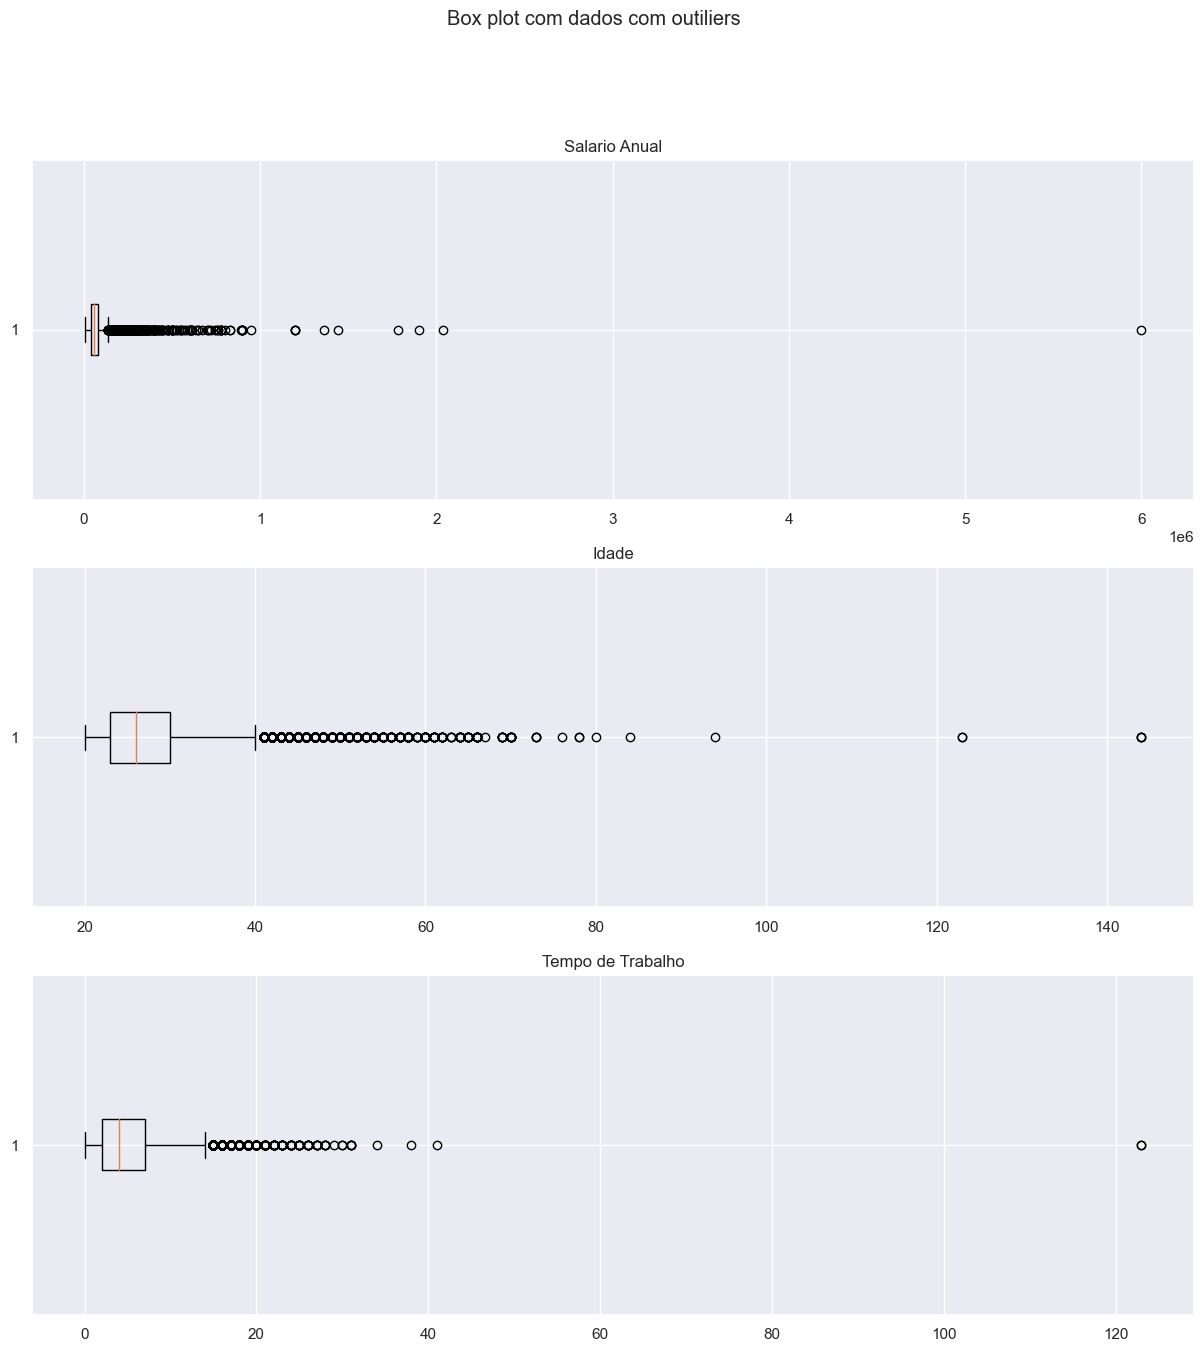

In [5]:
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.suptitle('Box plot com dados com outiliers')
ax1.boxplot(x=data.salario_anual,vert=False)
ax1.set_title('Salario Anual')
ax2.boxplot(x=data.idade,vert=False)
ax2.set_title('Idade')
ax3.boxplot(x=data.tempo_de_trabalho,vert=False)
ax3.set_title('Tempo de Trabalho')
plt.show()

In [6]:
##### Remoção 
# Identificação
data.reset_index(drop=True,inplace=True)
lista1=list(data.query("idade>=100").index)
lista2=list(data.query("tempo_de_trabalho>=100").index)
lista3=list(data.query("salario_anual>=1000000").index)

#Real Remoção

for i in [lista1,lista2,lista3]:
  data.drop(i,inplace=True,errors='ignore')
data.reset_index(drop=True,inplace=True)

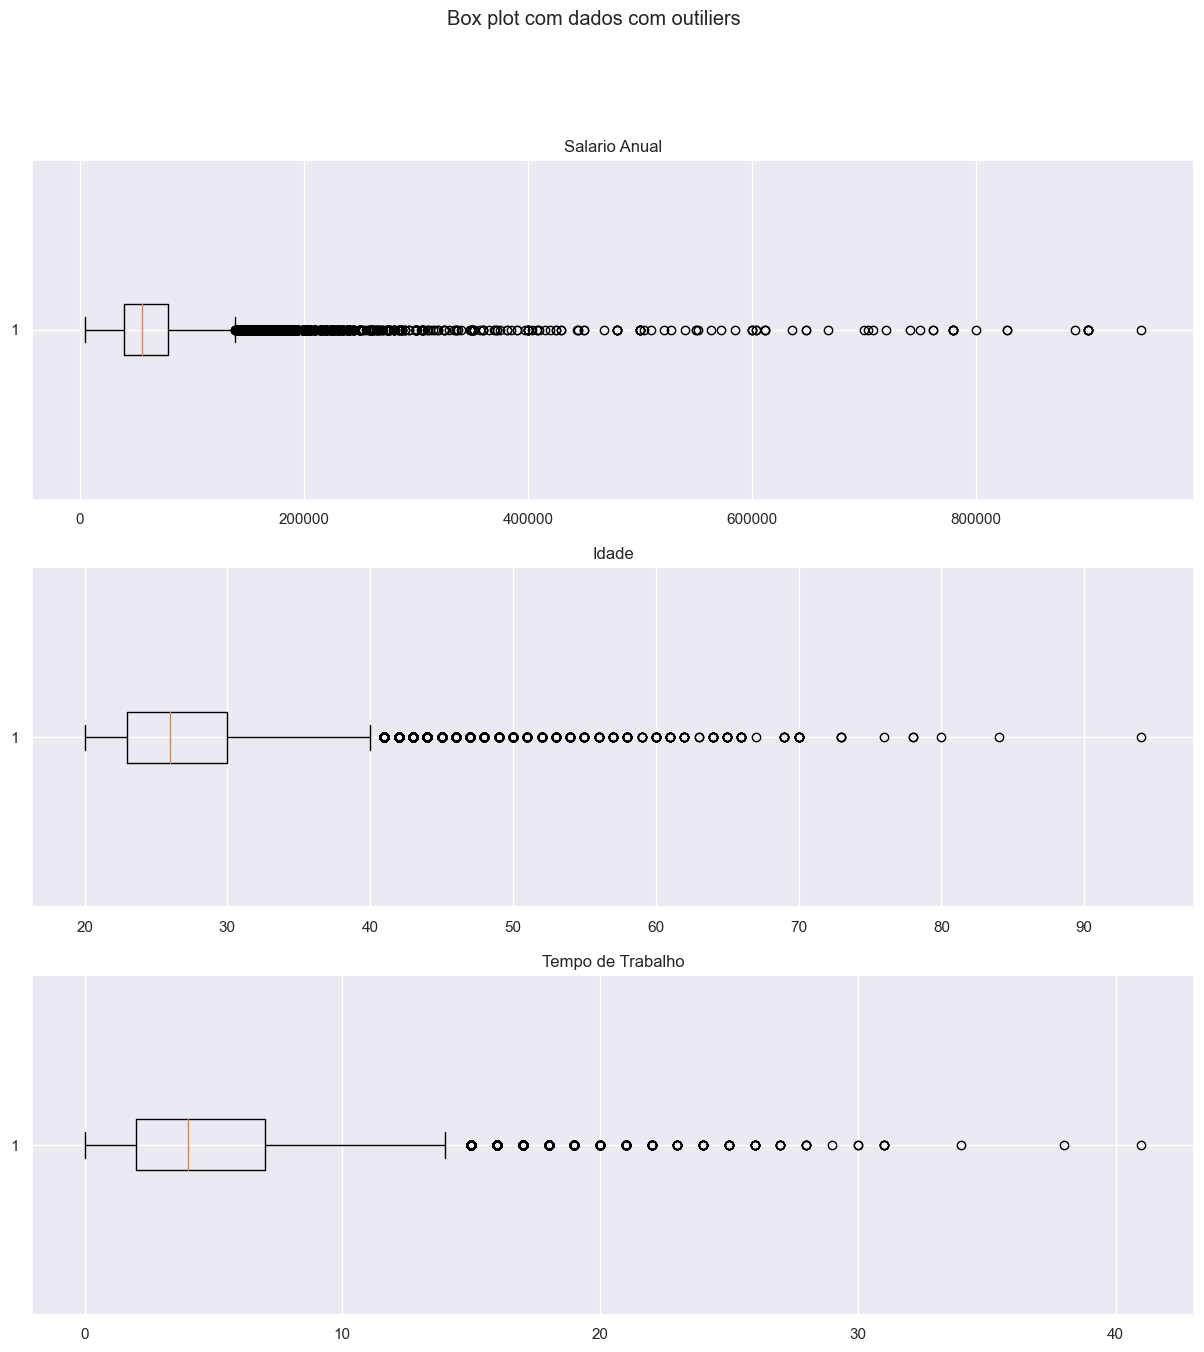

In [7]:
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.suptitle('Box plot com dados com outiliers')
ax1.boxplot(x=data.salario_anual,vert=False)
ax1.set_title('Salario Anual')
ax2.boxplot(x=data.idade,vert=False)
ax2.set_title('Idade')
ax3.boxplot(x=data.tempo_de_trabalho,vert=False)
ax3.set_title('Tempo de Trabalho')
plt.show()

# Correlação

In [8]:
data.corr()

C:\Users\hever\AppData\Local\Temp\ipykernel_22108\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,idade,salario_anual,tempo_de_trabalho,valor_emprestimo,taxa_de_juros,possibilidade_de_inadimplencia,renda_percentual,inadimplente,tempo_solicitacao
idade,1.000000,0.134785,0.168845,0.047951,0.011405,-0.020441,-0.039682,0.006855,0.839302
salario_anual,0.134785,1.000000,0.169088,0.340976,0.000991,-0.175190,-0.304477,-0.003961,0.111173
tempo_de_trabalho,0.168845,0.169088,1.000000,0.106458,-0.050653,-0.082863,-0.057174,-0.027524,0.141193
valor_emprestimo,0.047951,0.340976,0.106458,1.000000,0.140648,0.104623,0.568878,0.040035,0.043898
taxa_de_juros,0.011405,0.000991,-0.050653,0.140648,1.000000,0.316737,0.114250,0.474905,0.015427
possibilidade_de_inadimplencia,-0.020441,-0.175190,-0.082863,0.104623,0.316737,1.000000,0.375108,0.176373,-0.014416
renda_percentual,-0.039682,-0.304477,-0.057174,0.568878,0.114250,0.375108,1.000000,0.035245,-0.030066
inadimplente,0.006855,-0.003961,-0.027524,0.040035,0.474905,0.176373,0.035245,1.000000,0.004636
tempo_solicitacao,0.839302,0.111173,0.141193,0.043898,0.015427,-0.014416,-0.030066,0.004636,1.000000


> HeatMap

C:\Users\hever\AppData\Local\Temp\ipykernel_22108\1718436148.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin=0, vmax=1)


<Figure size 1500x1500 with 0 Axes>

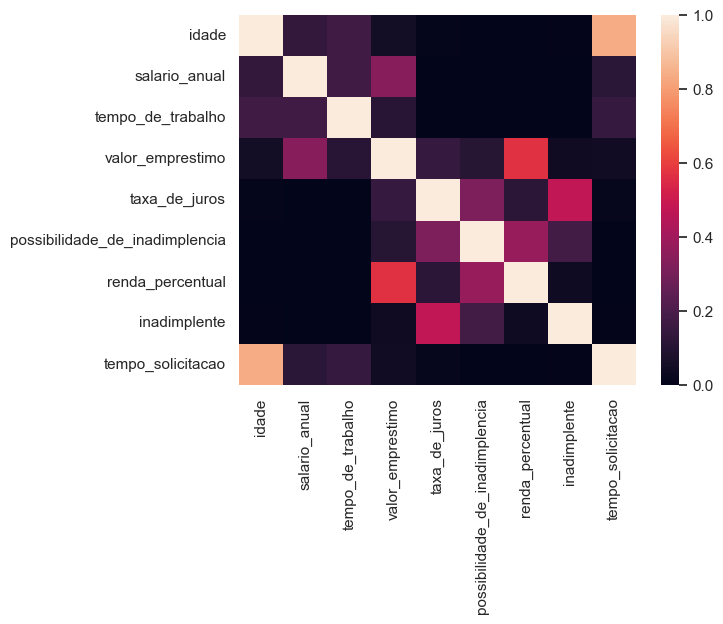

<Figure size 1500x1500 with 0 Axes>

In [9]:
sns.heatmap(data.corr(), vmin=0, vmax=1)
plt.figure(figsize=(15,15))

# Tratamento das variaveis X e Y

In [10]:
# definição
y = data[['inadimplente']]
##############################################################################################
print('-'*100)
print("As dimensões da variavel y são:", y.shape)
print('-'*100)
#################################################################################################
x=data.drop(['inadimplente'],axis=1)
##############################################################################################
print('-'*100)
print(" As dimensões da variavel x são:" ,x.shape)
print('-'*100)
#################################################################################################
# One hot enconding

colunas_categoricas = ['situacao_moradia','motivo_do_emprestimo', 'pontuacao']

one_hot = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),colunas_categoricas), remainder='passthrough')

x = one_hot.fit_transform(x)
x = pd.DataFrame(x, columns=one_hot.get_feature_names_out())

filename= 'one_hot_enc.pkl'
with open(f'./{filename}', 'wb') as file:
    pk.dump(one_hot, file)

# MinMaxScaler
norm=MinMaxScaler()
norm.fit(x)
x= norm.transform(x)

filename= 'norm.pkl'
with open(f'./{filename}', 'wb') as file:
    pk.dump(norm, file)






----------------------------------------------------------------------------------------------------
As dimensões da variavel y são: (34104, 1)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
 As dimensões da variavel x são: (34104, 11)
----------------------------------------------------------------------------------------------------


# Pipeline

Rebalançeamento pelo SMOTE
**************************************************
A base de dados para treino tem 39,349   e para teste tem 16,865
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Pipeline
----------------------------------------------------------------------------------------------------
MinMaxScaler()
********************
GradientBoostingClassifier(max_depth=8, max_features='sqrt', subsample=0.85)
----------------------------------------------------------------------------------------------------


d:\Arquivos-antigos\Progamação\challenge\env\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report
......................................................
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8360
         1.0       0.85      0.97      0.91      8505

    accuracy                           0.90     16865
   macro avg       0.91      0.90      0.90     16865
weighted avg       0.91      0.90      0.90     16865

......................................................
roc_auc: 0.9781772543029854
----------------------------------------------------------------------------------------------------
Pipeline
----------------------------------------------------------------------------------------------------
MinMaxScaler()
********************
DummyClassifier()
----------------------------------------------------------------------------------------------------
Classification Report
......................................................
              precision    recall  f1-score   support

         0.0   

d:\Arquivos-antigos\Progamação\challenge\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Arquivos-antigos\Progamação\challenge\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Arquivos-antigos\Progamação\challenge\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

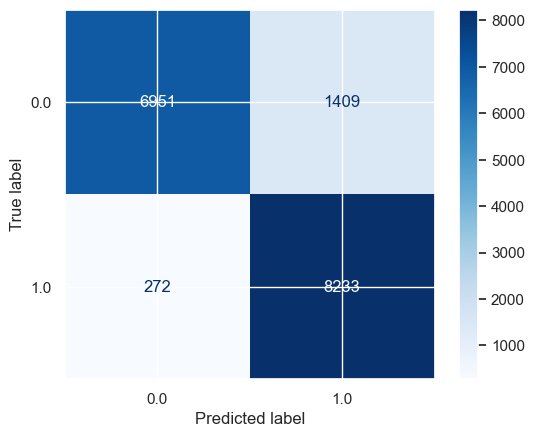

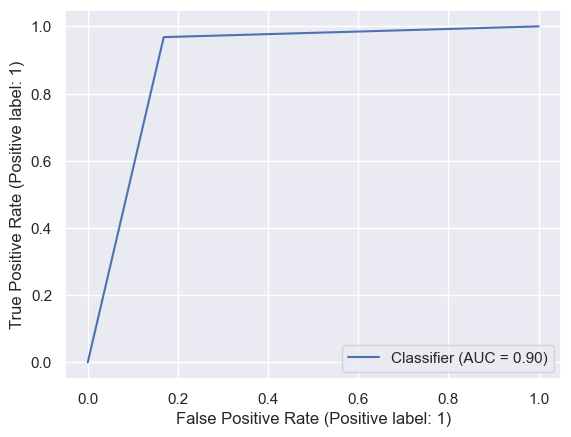

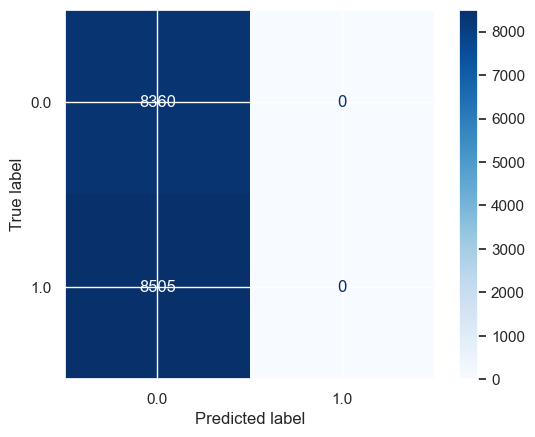

In [44]:
SEED= 42

#Balanceamento

balanca= SMOTE(random_state=SEED)
x_balanceado, y_balanceado = balanca.fit_resample(x,y)

print('Rebalançeamento pelo SMOTE')
print('*'*50)

#Separação


x_treino,x_teste,y_treino,y_teste = train_test_split(x_balanceado, y_balanceado, test_size= 0.30, random_state=SEED)
X_treino= x_treino.shape[0]
X_teste= x_teste.shape[0]

print('A base de dados para treino tem %s   e para teste tem %s'  % (X_treino.__format__(',d'), X_teste.__format__(',d')))
print('--'*50)

norm= MinMaxScaler()
model= GradientBoostingClassifier(max_depth=8,max_features='sqrt',subsample=0.85)
model_dummer= DummyClassifier()
print('--'*50)
pipe= Pipeline([('norm', norm), ('estimador', model)])

print('Pipeline')
print('--'*50)
print(pipe.named_steps['norm'])
print('*'*20)
print(pipe.named_steps['estimador'])
print('--'*50)

pipe.fit(x_treino,y_treino)

Y_pred= pipe.predict(x_teste)


print('Classification Report')
print('.'*54)
print(classification_report(y_teste,Y_pred))
print('.'*54)



prob_y_pred = pipe.predict_proba(x_teste)[:, 1]

print('roc_auc:', roc_auc_score(y_teste, prob_y_pred))

matriz_confusao = ConfusionMatrixDisplay.from_estimator(
    pipe, x_teste, y_teste, cmap='Blues')

RocCurveDisplay.from_predictions(y_teste, Y_pred)

filename= 'model.pkl'
with open(f'./{filename}', 'wb') as file:
    pk.dump(pipe, file)



print('--'*50)

pipe_dummer= Pipeline([('norm', norm), ('estimador', model_dummer)])

print('Pipeline')
print('--'*50)
print(pipe_dummer.named_steps['norm'])
print('*'*20)
print(pipe_dummer.named_steps['estimador'])
print('--'*50)

pipe_dummer.fit(x_treino,y_treino)

predict_dummer= pipe_dummer.predict(x_teste)



print('Classification Report')
print('.'*54)
print(classification_report(y_teste,predict_dummer))
print('.'*54)

matriz_confusao = ConfusionMatrixDisplay.from_estimator(
     pipe_dummer, x_teste, y_teste, cmap='Blues')

